In [1]:
from gpstools import viz
from gpstools.parser import *
from gpstools.track.track import *
from gpstools.track.utils import build_sparse_track
from gpstools.track.activity_detection import *
from gpstools.ss_analysis.ss_analysis_graph import SSAnalysisGraph
import os

In [2]:
PATH_TO_TRACKS='data/vladimir/vladimir_pro/'
REFERENCE_TRACK='rusanov_su1.gpx'
TRACK_NAME='vladimir_test_4'
TRACK_TITLE='Владимир STI-Club'

Processing file data/vladimir/vladimir_pro/rusanov_su1.gpx
Parsing Racebox gpx track
Load track rusanov_su1 with 59788 points
Using built-in speed
Track rusanov_su1
Start time: 2019-02-24 08:12:14.620000
End time: 2019-02-24 09:14:10.460000
Total time: 1:01:55.840000
Total distance travelled: 26.978 km
Total average speed: 26.14 kph
Max speed: 180.43 kph
Average speed: 25.76 kph


Dropping candidate by duration 7
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 40
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 7
Dropping candidate by duration 0
Dropping candidate by duration 4
Dropping candidate by duration 1
Dropping candidate by duration 0
Dropping candidate by

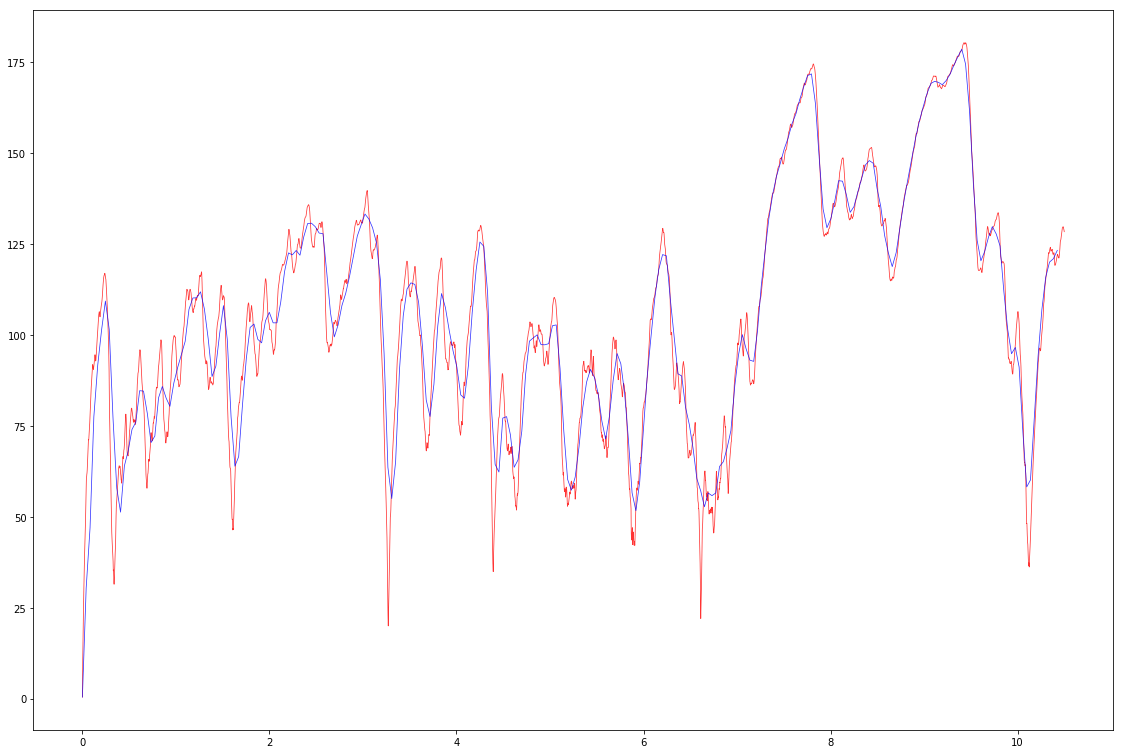

In [3]:
# Loading and processing reference

track = load_track(os.path.join(PATH_TO_TRACKS, REFERENCE_TRACK))
track.print_stats()

activity_segments = get_activity_segments_for_track(track, DEFAULT_ACTIVITY_DETECTION_PARAMS)
for segment in activity_segments:
    segment.print_stats()

track = track.crop_to_activity_segment(activity_segments[2], 'rusanov')
#track.print_stats()

#viz.plot_distance_speed_graph([track])
#viz.generate_reference_selection_graph([track])

track = track.crop_to_point_idx(6433)
track.print_stats()

reference_track = build_sparse_track(track)
reference_track.name = 'reference'
# reference_track.print_stats()

# viz.plot_distance_speed_graph([track, reference_track])

In [ ]:
# For processing individual tracks and finding bugs
    
track = load_track('data/vladimir/vladimir_pro/rusanov_su1.gpx')
track.print_stats()

activity_segments = get_activity_segments_for_track(track, DEFAULT_ACTIVITY_DETECTION_PARAMS)
for segment in activity_segments:
    segment.print_stats()

# Test comparision for this track only
    #comparison = TrackComparison(reference_track, [track])

#print_tracks_stats(comparison.tracks)

# viz.plot_distance_speed_graph_for_tracks([comparison.tracks[0], comparison.aligned_tracks[0]])


In [ ]:
# Loading all tracks

tracks = load_tracks(PATH_TO_TRACKS)
#print_tracks_stats(tracks)

comparison = TrackComparison(reference_track, tracks)

print_tracks_stats(comparison.tracks)

In [ ]:
comparison.build_comparison_graph(TRACK_NAME, TRACK_TITLE)